In [1]:
import warnings
warnings.filterwarnings("ignore")
from pyforest import *
import pandas_profiling as pp   
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.decomposition import FactorAnalysis
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data= pd.read_csv('cleaned_data.csv')

In [3]:
data.isna().sum().sum()

0

In [4]:
data.head()

,age,ed,income,lninc,debtinc,lncreddebt,lnothdebt,spoused,reside,pets,...,spousedcat,voice,card2fee,ownipod,commutebike,ownipod.1,voice.1,callcard,card2fee.1,ln_totalspend
0,20,15,31.0,3.433987,11.1,0.183079,0.806516,-1,3,0,...,-1,1,0,1,0,1,1,1,0,5.013697
1,22,17,15.0,2.708050,18.6,0.200505,0.449788,-1,2,6,...,-1,1,0,1,1,1,1,1,0,4.363608
2,67,14,35.0,3.555348,9.9,-0.074056,0.930738,13,3,3,...,2,0,0,0,0,0,0,1,0,5.888795
3,23,16,20.0,2.995732,5.7,-3.401644,0.110826,18,5,0,...,4,0,0,1,0,1,0,1,0,5.887242
4,26,16,23.0,3.135494,1.7,-1.538705,-1.735336,13,4,0,...,2,1,0,0,0,0,1,1,0,6.232114


In [5]:
pandas_profiling.ProfileReport(data)

Number of variables,84
Number of observations,4998
Total Missing (%),0.0%
Total size in memory,3.2 MiB
Average record size in memory,672.0 B
Numeric,42
Categorical,0
Boolean,26
Date,0
Text (Unique),0
Rejected,16


In [6]:
drop_list = ['address','age','ln_cardmon','card2fee','tenure','card2tenure','ed','lninc','lnothdebt','lnlongmon','longmon','ownipod','spoused','sqrt_creddebt','voice','card2tenurecat']
data.drop(drop_list,1,inplace=True)
data.shape

(4998, 68)

In [9]:
X = data.drop('ln_totalspend',1)
y= data.ln_totalspend

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=10):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    print(X.shape)
    return X.iloc[:5, variables]

In [11]:
calculate_vif_(data)

dropping 'pets' at index: 4
dropping 'owntv' at index: 44
dropping 'lnlongten' at index: 14
dropping 'ln_totalspend' at index: 64
dropping 'agecat' at index: 21
dropping 'cardtenurecat' at index: 35
dropping 'inccat' at index: 26
dropping 'empcat' at index: 24
dropping 'carvalue' at index: 11
dropping 'ln_othdebt' at index: 18
dropping 'owncd' at index: 39
dropping 'cardtenure' at index: 48
dropping 'commutetime' at index: 11
dropping 'ownvcr' at index: 36
dropping 'addresscat' at index: 24
dropping 'hourstv' at index: 16
dropping 'owndvd' at index: 34
Remaining variables:
Index(['income', 'debtinc', 'lncreddebt', 'reside', 'pets_cats', 'pets_dogs',
       'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish',
       'pets_freshfish', 'longten', 'tollten', 'equipten', 'cardten',
       'wireten', 'gender', 'edcat', 'jobcat', 'employ', 'retire', 'jobsat',
       'homeown', 'carown', 'carcatvalue', 'reason', 'vote', 'card', 'card2',
       'tollfree', 'wireless', 'internet', 'call

,income,debtinc,lncreddebt,reside,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,...,ownpc,response_03,multline,news,spousedcat,commutebike,ownipod.1,voice.1,callcard,card2fee.1
0,31.0,11.1,0.183079,3,0,0,0,0,0,0,...,0,0,1,0,-1,0,1,1,1,0
1,15.0,18.6,0.200505,2,0,0,0,0,0,0,...,1,0,1,1,-1,1,1,1,1,0
2,35.0,9.9,-0.074056,3,2,1,0,0,0,0,...,0,0,1,1,2,0,0,0,1,0
3,20.0,5.7,-3.401644,5,0,0,0,0,0,0,...,1,0,1,1,4,0,1,0,1,0
4,23.0,1.7,-1.538705,4,0,0,0,0,0,0,...,1,0,0,0,2,0,0,1,1,0


In [12]:
col = ['income', 'debtinc', 'lncreddebt', 'reside', 'pets_cats', 'pets_dogs','pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish','pets_freshfish', 'longten', 'tollten', 'equipten', 'cardten','wireten', 'gender', 'edcat', 'jobcat', 'employ', 'retire', 'jobsat','homeown', 'carown', 'carcatvalue', 'reason', 'vote', 'card', 'card2','tollfree', 'wireless', 'internet', 'callwait', 'confer', 'ownpda','ownfax', 'hometype', 'pager', 'callid', 'forward', 'equip', 'ownpc','response_03', 'multline', 'news', 'spousedcat', 'commutebike','ownipod.1', 'voice.1', 'callcard', 'card2fee.1']
data = data[col]
data['ln_totalspend'] = y
data.head()

,income,debtinc,lncreddebt,reside,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,...,response_03,multline,news,spousedcat,commutebike,ownipod.1,voice.1,callcard,card2fee.1,ln_totalspend
0,31.0,11.1,0.183079,3,0,0,0,0,0,0,...,0,1,0,-1,0,1,1,1,0,5.013697
1,15.0,18.6,0.200505,2,0,0,0,0,0,0,...,0,1,1,-1,1,1,1,1,0,4.363608
2,35.0,9.9,-0.074056,3,2,1,0,0,0,0,...,0,1,1,2,0,0,0,1,0,5.888795
3,20.0,5.7,-3.401644,5,0,0,0,0,0,0,...,0,1,1,4,0,1,0,1,0,5.887242
4,23.0,1.7,-1.538705,4,0,0,0,0,0,0,...,0,0,0,2,0,0,1,1,0,6.232114


In [13]:
feature_columns = data.columns.difference(['ln_totalspend'])

In [14]:
# from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( data[feature_columns],
                                                  data['ln_totalspend'],
                                                  test_size = 0.2,
                                                  random_state = 148 )

In [15]:
from sklearn.ensemble import RandomForestRegressor
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_clf.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [16]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )
radm_test_pred.head()

,actual,predicted
3194,4.874816,5.958266
4522,6.233940,6.602904
449,7.083715,6.345206
183,6.571765,6.668893
970,5.862949,6.449937


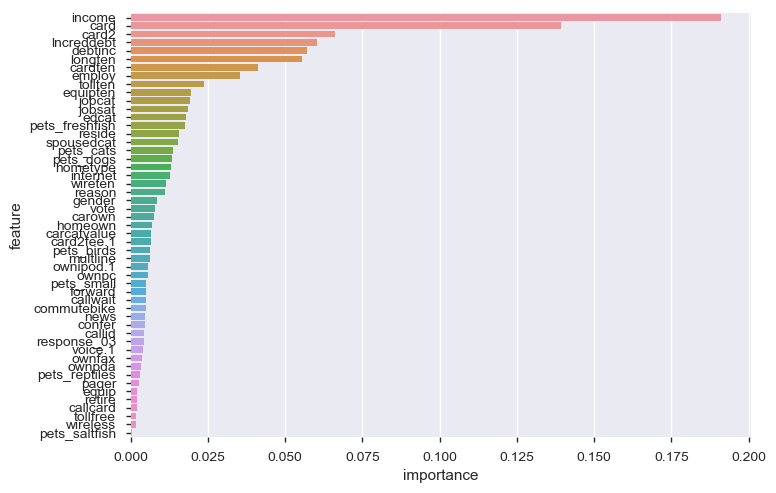

In [17]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank= pd.DataFrame(columns=['rank','feature','importance'])

for f in range(train_X.shape[1]):
 feature_rank.loc[f]=[f+1,
                      train_X.columns[indices[f]],
                      radm_clf.feature_importances_[indices[f]]]

sns.barplot(y='feature',x='importance',data = feature_rank)

In [18]:
rf_30= feature_rank.feature[:30]
d=list(rf_30)
list(rf_30)

['income',
 'card',
 'card2',
 'lncreddebt',
 'debtinc',
 'longten',
 'cardten',
 'employ',
 'tollten',
 'equipten',
 'jobcat',
 'jobsat',
 'edcat',
 'pets_freshfish',
 'reside',
 'spousedcat',
 'pets_cats',
 'pets_dogs',
 'hometype',
 'internet',
 'wireten',
 'reason',
 'gender',
 'vote',
 'carown',
 'homeown',
 'carcatvalue',
 'card2fee.1',
 'pets_birds',
 'multline']

In [19]:
rf_data2=data[rf_30]

In [20]:
rf_data2['ln_totalspent']= data.ln_totalspend

In [21]:
feature_columns = rf_data2.columns.difference( ['ln_totalspent'] )
train_X, test_X, train_y, test_y = train_test_split( rf_data2[feature_columns],
                                                  data['ln_totalspend'],
                                                  test_size = 0.3,
                                                  random_state = 123 )
import statsmodels.api as sm
train_X = sm.add_constant(train_X)
lm= sm.OLS(train_y,train_X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_totalspend   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          2.45e-183
Time:                        15:03:21   Log-Likelihood:                -2994.1
No. Observations:                3498   AIC:                             6050.
Df Residuals:                    3467   BIC:                             6241.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.6547      0.077     86.

In [22]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)

In [23]:
y_pred.head()

3334    5.917269
2455    6.209590
4555    6.022145
4882    5.926337
92      6.099278
dtype: float64

In [24]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const             6.654747e+00
carcatvalue      -2.349854e-03
card             -1.690216e-01
card2            -9.185844e-02
card2fee.1       -1.094992e-02
cardten          -2.742166e-05
carown            2.469696e-02
debtinc          -4.851002e-03
edcat            -1.453847e-02
employ           -2.651158e-03
equipten          6.153267e-06
gender           -7.411366e-02
homeown           2.566106e-02
hometype          1.166805e-02
income            4.479272e-03
internet          1.833135e-02
jobcat           -1.082832e-02
jobsat           -1.419859e-03
lncreddebt        6.201696e-02
longten           7.111861e-06
multline         -1.639962e-02
pets_birds       -1.288217e-02
pets_cats         4.152458e-04
pets_dogs         4.656400e-04
pets_freshfish    1.062184e-03
reason           -6.018765e-03
reside           -1.086448e-03
spousedcat        8.939022e-03
tollten           9.851100e-06
vote              1.532747e-02
wireten           3.685079e-07
dtype: float64
R2:  0.2418

In [25]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print( 'MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.4300009666321056
MSE: 0.3064190853371932
RMSE: 0.5535513393870466


In [26]:
# test_X = sm.add_constant(train_X)
y_pred = lm.predict(train_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print( 'MAE:', metrics.mean_absolute_error(train_y, y_pred))
print ('MSE:', metrics.mean_squared_error(train_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred)))

MAE: 0.4458215871465967
MSE: 0.32432875059150623
RMSE: 0.5694986835731108


In [27]:
from sklearn.preprocessing import MinMaxScaler

rf_data2 = rf_data2.drop(['ln_totalspent'], axis=1)

n = rf_data2.select_dtypes(['float64', 'int64']).columns.values 

if len(n) > 0:
    sc = MinMaxScaler()

    # Scaling numeric features
    train_norm = sc.fit_transform(rf_data2[n])
    rf_data2[n] = train_norm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
rf_data2.head()

,income,card,card2,lncreddebt,debtinc,longten,cardten,employ,tollten,equipten,...,wireten,reason,gender,vote,carown,homeown,carcatvalue,card2fee.1,pets_birds,multline
0,0.083647,0.50,1.00,0.591487,0.364912,0.006829,0.014961,0.000000,0.040493,0.034271,...,0.000000,1.000,1.0,1.0,1.0,0.0,0.5,0.0,0.0,1.0
1,0.022813,0.25,0.75,0.594362,0.628070,0.070044,0.152105,0.000000,0.000000,0.536764,...,0.371629,1.000,0.0,0.0,1.0,1.0,0.5,0.0,0.0,1.0
2,0.098856,0.25,0.75,0.549059,0.322807,0.396093,0.351586,0.307692,0.000000,0.000000,...,0.000000,0.125,1.0,0.0,1.0,1.0,0.5,0.0,0.0,1.0
3,0.041824,0.25,0.50,0.000000,0.175439,0.042054,0.170806,0.000000,0.000000,0.000000,...,0.000000,1.000,0.0,0.0,1.0,1.0,0.5,0.0,0.0,1.0
4,0.053230,0.75,0.00,0.307389,0.035088,0.015302,0.089767,0.019231,0.097479,0.000000,...,0.090681,1.000,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0


In [29]:
rf_data2['ln_totalspent'] = data.ln_totalspend

In [30]:
feature_columns= rf_data2.columns.difference(['ln_totalspent'])

In [31]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
rfe = RFE(linreg, 15)
rfe = rfe.fit(rf_data2[feature_columns], rf_data2['ln_totalspent'] )
print(rfe.support_)

print(rfe.ranking_)

[ True  True  True False  True False  True  True  True False  True False
  True  True  True  True False  True False False  True False False False
 False  True False False False False]
[ 1  1  1  2  1  7  1  1  1  6  1  5  1  1  1  1 10  1  8  9  1 12 16  3
  4  1 15 14 13 11]


In [32]:
zip(feature_columns,rfe.ranking_)

In [33]:
zipped=zip(feature_columns,rfe.ranking_)
s=list(sorted(zipped, key=lambda x: x[1]))
a,b = map(list, zip(*s))
top15=a[:15]
print(top15)
print(b)

['carcatvalue', 'card', 'card2', 'cardten', 'debtinc', 'edcat', 'employ', 'gender', 'hometype', 'income', 'internet', 'jobcat', 'lncreddebt', 'pets_birds', 'reside']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [34]:
top15

['carcatvalue',
 'card',
 'card2',
 'cardten',
 'debtinc',
 'edcat',
 'employ',
 'gender',
 'hometype',
 'income',
 'internet',
 'jobcat',
 'lncreddebt',
 'pets_birds',
 'reside']

In [35]:
top15 = rf_data2[top15]
top15['ln_totalspent'] =data.ln_totalspend

In [36]:
feature_columns = top15.columns.difference( ['ln_totalspent'] )
train_X, test_X, train_y, test_y = train_test_split( top15[feature_columns],
                                                  top15['ln_totalspent'],
                                                  test_size = 0.3,
                                                  random_state = 193 )
import statsmodels.api as sm
train_X = sm.add_constant(train_X)
lm= sm.OLS(train_y,train_X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_totalspent   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     66.67
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          4.62e-178
Time:                        15:03:25   Log-Likelihood:                -2939.4
No. Observations:                3498   AIC:                             5911.
Df Residuals:                    3482   BIC:                             6009.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.1530      0.049    124.850      

In [37]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)

In [38]:
y_pred.head()

629     6.193719
2183    5.844683
4758    5.802582
1964    5.757991
4674    5.884767
dtype: float64

In [39]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const          6.153011
carcatvalue    0.042860
card          -0.652374
card2         -0.348343
cardten       -0.003712
debtinc       -0.127907
edcat         -0.065397
employ        -0.149830
gender        -0.078526
hometype       0.040502
income         1.078873
internet       0.086037
jobcat        -0.049491
lncreddebt     0.358954
pets_birds    -0.133391
reside         0.020919
dtype: float64
R2:  0.2231326049887511


In [40]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print( 'MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.45135705065786064
MSE: 0.32965036725662417
RMSE: 0.5741518677637687


In [41]:
# test_X = sm.add_constant(train_X)
y_pred = lm.predict(train_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print( 'MAE:', metrics.mean_absolute_error(train_y, y_pred))
print ('MSE:', metrics.mean_squared_error(train_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred)))

MAE: 0.43718401719684935
MSE: 0.31434500107076085
RMSE: 0.5606647849390586


In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [43]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler() , Lasso(random_state = 123)),
    'ridge' : make_pipeline(StandardScaler() , Ridge(random_state = 123)),
    'enet'  : make_pipeline(StandardScaler()  , ElasticNet(random_state = 123)),    
    'rf'    : make_pipeline(StandardScaler()  , RandomForestRegressor(random_state = 123)),
    'gb'    : make_pipeline(StandardScaler()  , GradientBoostingRegressor(random_state = 123))
}

In [44]:
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}
# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}
# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' :[ 0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10],
    'elasticnet__l1_ratio' : [ 0.1 , 0.3 , 0.5 , 0.7 , 0.9] 
}

# Random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
    
}
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge'  : ridge_hyperparameters,
    'enet'     : enet_hyperparameters,
    'gb'     : gb_hyperparameters
}

In [45]:

#Finally, run this code to check that hyperparameters is set up correctly.

for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')


enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [46]:
 from sklearn.model_selection import GridSearchCV
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline , hyperparameters[name] , cv = 5, verbose=2,n_jobs=3, return_train_score=True)
    
    # Fit model on X_train, y_train
    model.fit(train_X , train_y)
    
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   23.6s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   24.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


lasso has been fitted.
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    1.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


ridge has been fitted.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done 225 out of 225 | elapsed:    5.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


enet has been fitted.
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  1.4min finished


rf has been fitted.
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   24.5s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:  1.2min finished


gb has been fitted.


In [47]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(test_X)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [48]:
# Display best_score_ for each fitted model
for name , model in fitted_models.items():
    print(name , model.best_score_)

lasso 0.21312742182780792
ridge 0.21311890603889772
enet 0.21316406377092895
rf 0.29101866788572045
gb 0.306582608202112


In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
for name, model  in fitted_models.items():
    pred = model.predict(test_X)
    print(name)
    print("----------")
    print("R^2:" , r2_score(test_y , pred))
    print("MAE: ", mean_absolute_error(test_y , pred))
    print("RMSE: ", mean_squared_error(test_y , pred))
    

lasso
----------
R^2: 0.2364013879746656
MAE:  0.4514235234271592
RMSE:  0.32973277648507826
ridge
----------
R^2: 0.23655667760627375
MAE:  0.4513419671441274
RMSE:  0.32966572020631724
enet
----------
R^2: 0.23623102743898827
MAE:  0.45138816749838545
RMSE:  0.32980634059526354
rf
----------
R^2: 0.29732274345255894
MAE:  0.43457006525231223
RMSE:  0.3034260659009923
gb
----------
R^2: 0.3257925224154815
MAE:  0.42487908616573095
RMSE:  0.2911324091086336
